In [1]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

train = np.loadtxt('train.csv', delimiter=',', dtype=np.float32)
test = np.loadtxt('test.csv', delimiter=',', dtype=np.float32)

x_train_data = train[:, 0:-5]
y_train_data = train[:, -5:]
x_test_data = test[:, 0:-5]
y_test_data = test[:, -5:]


In [93]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras import models
from keras import layers

model = Sequential()

model.add(Dense(5, input_shape=(7,), activation='softmax'))
#model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 5)                 40        
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


In [97]:
hist=model.fit(x_train_data, y_train_data, validation_data=(x_test_data, y_test_data), epochs=150)

Train on 945 samples, validate on 405 samples
Epoch 1/150
945/945 [==============================] - 0s 63us/sample - loss: 1.4956 - acc: 0.3302 - val_loss: 1.5695 - val_acc: 0.2444
Epoch 2/150
945/945 [==============================] - 0s 59us/sample - loss: 1.4960 - acc: 0.3344 - val_loss: 1.5673 - val_acc: 0.2568
Epoch 3/150
945/945 [==============================] - 0s 59us/sample - loss: 1.4939 - acc: 0.3323 - val_loss: 1.5666 - val_acc: 0.2420
Epoch 4/150
945/945 [==============================] - 0s 59us/sample - loss: 1.4939 - acc: 0.3323 - val_loss: 1.5665 - val_acc: 0.2543
Epoch 5/150
945/945 [==============================] - 0s 60us/sample - loss: 1.4927 - acc: 0.3291 - val_loss: 1.5652 - val_acc: 0.2543
Epoch 6/150
945/945 [==============================] - 0s 60us/sample - loss: 1.4943 - acc: 0.3302 - val_loss: 1.5655 - val_acc: 0.2519
Epoch 7/150
945/945 [==============================] - 0s 62us/sample - loss: 1.4926 - acc: 0.3376 - val_loss: 1.5647 - val_acc: 0.2395
Ep

945/945 [==============================] - 0s 56us/sample - loss: 1.4890 - acc: 0.3259 - val_loss: 1.5610 - val_acc: 0.2642
Epoch 61/150
945/945 [==============================] - 0s 55us/sample - loss: 1.4890 - acc: 0.3333 - val_loss: 1.5617 - val_acc: 0.2617
Epoch 62/150
945/945 [==============================] - 0s 57us/sample - loss: 1.4883 - acc: 0.3344 - val_loss: 1.5592 - val_acc: 0.2667
Epoch 63/150
945/945 [==============================] - 0s 53us/sample - loss: 1.4874 - acc: 0.3354 - val_loss: 1.5603 - val_acc: 0.2642
Epoch 64/150
945/945 [==============================] - 0s 54us/sample - loss: 1.4881 - acc: 0.3333 - val_loss: 1.5608 - val_acc: 0.2642
Epoch 65/150
945/945 [==============================] - 0s 52us/sample - loss: 1.4873 - acc: 0.3323 - val_loss: 1.5613 - val_acc: 0.2617
Epoch 66/150
945/945 [==============================] - 0s 55us/sample - loss: 1.4899 - acc: 0.3376 - val_loss: 1.5603 - val_acc: 0.2716
Epoch 67/150
945/945 [==============================] 

Epoch 120/150
945/945 [==============================] - 0s 55us/sample - loss: 1.4841 - acc: 0.3333 - val_loss: 1.5574 - val_acc: 0.2691
Epoch 121/150
945/945 [==============================] - 0s 56us/sample - loss: 1.4846 - acc: 0.3386 - val_loss: 1.5599 - val_acc: 0.2617
Epoch 122/150
945/945 [==============================] - 0s 54us/sample - loss: 1.4866 - acc: 0.3354 - val_loss: 1.5587 - val_acc: 0.2667
Epoch 123/150
945/945 [==============================] - 0s 53us/sample - loss: 1.4839 - acc: 0.3386 - val_loss: 1.5589 - val_acc: 0.2741
Epoch 124/150
945/945 [==============================] - 0s 54us/sample - loss: 1.4848 - acc: 0.3312 - val_loss: 1.5573 - val_acc: 0.2568
Epoch 125/150
945/945 [==============================] - 0s 59us/sample - loss: 1.4864 - acc: 0.3354 - val_loss: 1.5574 - val_acc: 0.2593
Epoch 126/150
945/945 [==============================] - 0s 54us/sample - loss: 1.4858 - acc: 0.3333 - val_loss: 1.5600 - val_acc: 0.2593
Epoch 127/150
945/945 [===========

In [98]:
loss, accuracy = model.evaluate(x_test_data, y_test_data)
print("Accuracy = {:.2f}".format(accuracy))

Accuracy = 0.27


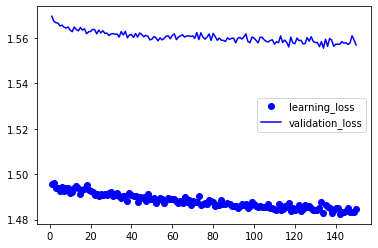

In [99]:
acc = hist.history["acc"]
val_acc = hist.history["val_acc"]
loss = hist.history["loss"]
val_loss = hist.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.figure()

plt.plot(epochs, loss, "bo", label = "learning_loss")
plt.plot(epochs, val_loss, "b", label = "validation_loss")
plt.legend()


plt.show()

In [24]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix

y_pred = model.predict(x_test_data)
y_test_class = np.argmax(y_test_data,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.47      0.43      0.45       100
           1       0.55      0.46      0.50        78
           2       0.56      0.60      0.58        62
           3       0.58      0.53      0.55        70
           4       0.46      0.57      0.51        95

    accuracy                           0.51       405
   macro avg       0.52      0.52      0.52       405
weighted avg       0.51      0.51      0.51       405

[[43 12 11  6 28]
 [12 36  7  8 15]
 [ 9  1 37  3 12]
 [13  8  4 37  8]
 [15  9  7 10 54]]


In [37]:
print(x_train_data)
np.argmax(model.predict([[10,0,0,10,4,5,1]]))

[[ 9.  6.  7. ...  9.  4.  8.]
 [ 0.  6.  7. ...  8.  0.  8.]
 [ 1.  6. 10. ...  0.  7.  9.]
 ...
 [10.  7.  5. ...  9.  4.  6.]
 [ 0.  3. 10. ...  6.  6.  8.]
 [ 7.  5.  3. ...  0.  6.  1.]]


2

In [42]:
import tensorflow as tf
from tensorflow import keras

model.save('my_model.h5')
